# Clothes Classification

This project aims to build a model capable of classifying clothes using tensorflow. The dataset used is Fashion-MNIST, which is a dataset of grayscale clothing images with a size of 28x28 which has been labeled into ten classes. There are 70,000 images in this dataset, splitted into 60,000 and 10,000 as the training set and the testing set, respectively.

Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras

tf.random.set_seed(1234)

Load the dataset

In [2]:
df = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = df.load_data()

Print the shape of data

In [3]:
print(X_train_full.shape, y_train_full.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Create a validation shape

In [4]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Create a list of class names for items in dataset

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Display some samples from the dataset

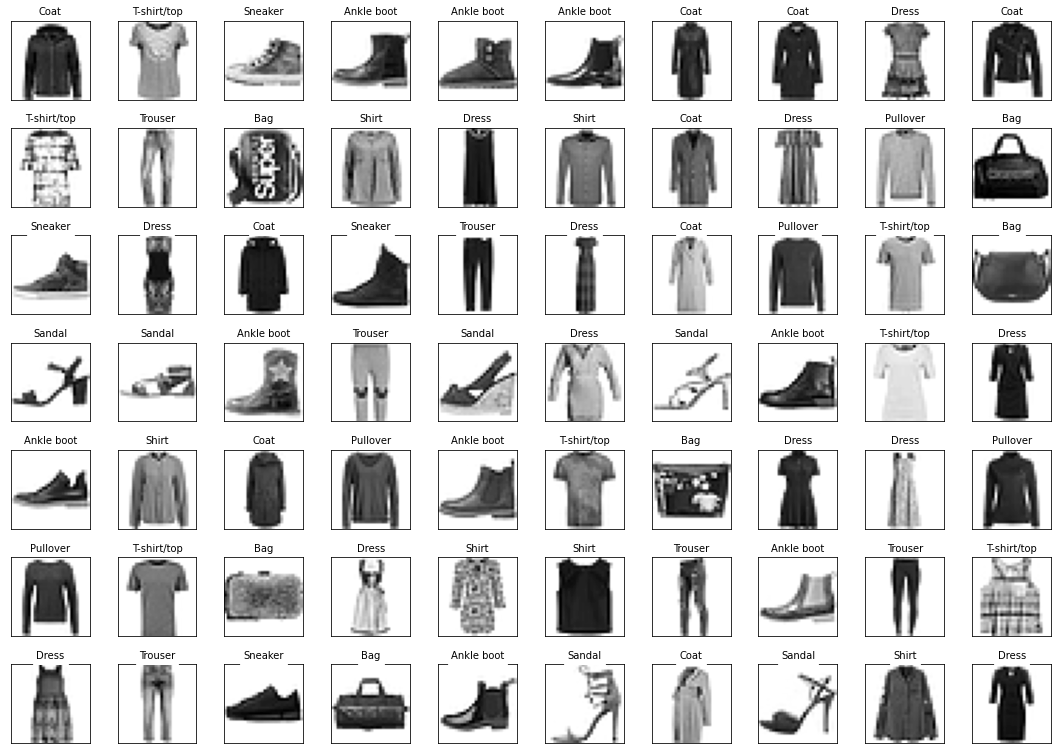

In [6]:
fig = plt.figure(figsize=(15, 15))

for i in range(70):
    digit = X_train[i]
    digit_image = digit.reshape(28, 28)
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(digit_image, cmap=plt.cm.binary)
    ax.set_title(str(class_names[y_train[i]]), backgroundcolor='white', fontsize=10)
plt.tight_layout()

Create the model using Sequential API

In [7]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

Shows the model summary

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


Compile the model

In [9]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="sgd",
              metrics=["accuracy"])

Train the model

In [10]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7101 - accuracy: 0.7651 - val_loss: 0.5056 - val_accuracy: 0.8316
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4872 - accuracy: 0.8291 - val_loss: 0.4478 - val_accuracy: 0.8464
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4432 - accuracy: 0.8439 - val_loss: 0.4371 - val_accuracy: 0.8438
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4154 - accuracy: 0.8536 - val_loss: 0.3943 - val_accuracy: 0.8656
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3958 - accuracy: 0.8597 - val_loss: 0.3955 - val_accuracy: 0.8600
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3807 - accuracy: 0.8662 - val_loss: 0.3857 - val_accuracy: 0.8656
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3674 - accuracy: 0.8701 - val_loss: 0.3692 - val_accuracy:

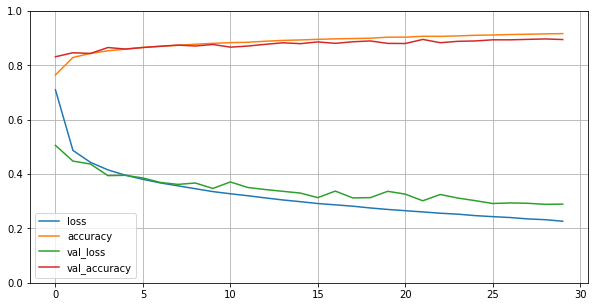

In [11]:
pd.DataFrame(history.history).plot(figsize=(10, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Evaluate the model on testing set

In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 66.7829 - accuracy: 0.8483


[66.78286743164062, 0.8482999801635742]

Predict the test set

In [13]:
y_pred = np.argmax(model.predict(X_test), axis=1)

313/313 [==============================] - 0s 1ms/step


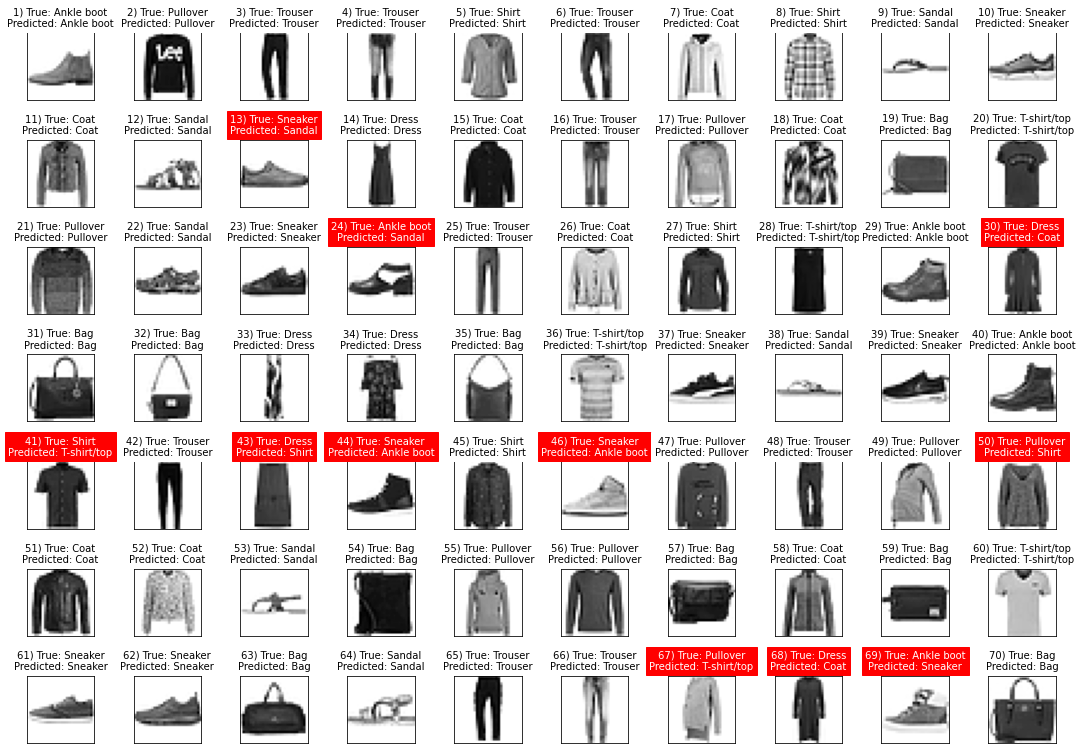

In [14]:
fig = plt.figure(figsize=(15, 15))

for i in range(70):
    digit = X_test[i]
    digit_image = digit.reshape(28, 28)
    ax = fig.add_subplot(10, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(digit_image, cmap=plt.cm.binary)
    
    if class_names[y_test[i]] != class_names[y_pred[i]]:
        color = "white"
        backgroundcolor ="red"
    else:
        color = "black"
        backgroundcolor ="white"
    ax.set_title(f"{i+1}) "
                 f"True: {str(class_names[y_test[i]])}\n"
                 f"Predicted: {str(class_names[y_pred[i]])}", color=color, backgroundcolor=backgroundcolor, fontsize=10)
plt.tight_layout()

## Save the model

In [15]:
model.save("model/clothes_clf_model.h5")

## Conclusion

In this project, we have successfully built a neural network model for clothing classification on the MNIST fashion dataset. The sequential model built consisting of two hidden layers was successfully trained with an accuracy of 0.917 and 0.895 on the training set and the validation set, respectively. Our model also obtained a decent accuracy on the testing set, which is 0.848